<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Join" data-toc-modified-id="Join-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Join</a></span></li><li><span><a href="#Number-of-genomes" data-toc-modified-id="Number-of-genomes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Number of genomes</a></span><ul class="toc-item"><li><span><a href="#Raw-MAGs" data-toc-modified-id="Raw-MAGs-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Raw MAGs</a></span></li><li><span><a href="#DAS-Tool" data-toc-modified-id="DAS-Tool-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>DAS-Tool</a></span></li><li><span><a href="#dRep" data-toc-modified-id="dRep-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>dRep</a></span></li></ul></li><li><span><a href="#CheckM-stats" data-toc-modified-id="CheckM-stats-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>CheckM stats</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Total" data-toc-modified-id="Total-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Total</a></span></li><li><span><a href="#By-host-class" data-toc-modified-id="By-host-class-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>By host class</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Summarize LLMGA results from runs on per-host-class "wOutVertebrata" metagenomes

# Var

In [2]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/MG_assembly_summary/'
tmp_out_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/'



In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
set.seed(8304)

source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')

In [4]:
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/MG_assembly_summary/ 


# Load

In [5]:
projects = c(
'MG_assembly_act',
'MG_assembly_amp',
'MG_assembly_ave',
'MG_assembly_mam',
'MG_assembly_rep'
)

In [6]:
# load bin files
bin_genomes = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    bin_dir = file.path(asmbl_dir, 'bin')
    
    # maxbin2
    bin_files = list.files(bin_dir, '*.fasta$', full.names=TRUE, recursive=TRUE)
    bin = data.frame(binID = gsub('\\.fasta$', '', basename(bin_files)),
                 fasta = bin_files,
                 binner = bin_files %>% dirname %>% basename,
                 sample = bin_files %>% dirname %>% dirname %>% basename)
    
    ## metabat2
    bin_files = list.files(bin_dir, '*.fa$', full.names=TRUE, recursive=TRUE)
    X = data.frame(binID = gsub('\\.fa$', '', basename(bin_files)),
                   fasta = bin_files,
                   binner = bin_files %>% dirname %>% basename,
                   sample = bin_files %>% dirname %>% dirname %>% basename)

    ## combine
    bin = rbind(bin, X)
    bin$projectID = projectID
    X = NULL
    return(bin)
}

# loading all bin files
bin = projects %>% as.list %>% lapply(bin_genomes, tmp_out_dir=tmp_out_dir) %>%
    do.call(rbind, .)
bin %>% dfhead

[1] 4374    5


binID,fasta,binner,sample,projectID
coassemble_contigs.001,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin/F14_Common_Bream/maxbin2_high_prob/coassemble_contigs.001.fasta,maxbin2_high_prob,F14_Common_Bream,MG_assembly_act
coassemble_contigs.002,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin/F14_Common_Bream/maxbin2_high_prob/coassemble_contigs.002.fasta,maxbin2_high_prob,F14_Common_Bream,MG_assembly_act
coassemble_contigs.003,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin/F14_Common_Bream/maxbin2_high_prob/coassemble_contigs.003.fasta,maxbin2_high_prob,F14_Common_Bream,MG_assembly_act


In [7]:
# MAGs selected by DAS-tool 
das_tool_genomes = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    das_tool_dir = file.path(asmbl_dir, 'bin_refine', 'DAS_Tool')
    
    dastool_files = list.files(das_tool_dir, '*.fa$', full.names=TRUE, recursive=TRUE)
    dastool = data.frame(binID = gsub('\\.fa$', '', basename(dastool_files)),
                    fasta = dastool_files)
    dastool$projectID = projectID
    return(dastool)
}

# loading all post das-tool files
dastool = projects %>% as.list %>% lapply(das_tool_genomes, tmp_out_dir=tmp_out_dir) %>%
    do.call(rbind, .)
dastool %>% dfhead

[1] 442   3


binID,fasta,projectID
X125_Common_Carp__maxbin2_low_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X125_Common_Carp__maxbin2_low_prob.001.contigs.fa,MG_assembly_act
X183_European_Chub__maxbin2_low_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X183_European_Chub__maxbin2_low_prob.001.contigs.fa,MG_assembly_act
X250_Common_Nase__maxbin2_low_prob.002.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/bin_refine/DAS_Tool/bins_DASTool_bins/X250_Common_Nase__maxbin2_low_prob.002.contigs.fa,MG_assembly_act


In [8]:
# listing dRep MAGs
drep_genomes = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    drep_dir = file.path(asmbl_dir, 'drep', 'drep')
    
    P = file.path(drep_dir, 'dereplicated_genomes')
    drep_files = list.files(P, '*.fa$', full.names=TRUE)
    drep = data.frame(binID = gsub('\\.fa$', '', basename(drep_files)),
                      fasta = drep_files)
    
    drep$projectID = projectID
    return(drep)
}

# drep genomes
drep = projects %>% as.list %>% lapply(drep_genomes, tmp_out_dir=tmp_out_dir) %>%
    do.call(rbind, .)
drep %>% dfhead

[1] 303   3


binID,fasta,projectID
X125_Common_Carp__maxbin2_low_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/drep/drep/dereplicated_genomes/X125_Common_Carp__maxbin2_low_prob.001.contigs.fa,MG_assembly_act
X183_European_Chub__maxbin2_low_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/drep/drep/dereplicated_genomes/X183_European_Chub__maxbin2_low_prob.001.contigs.fa,MG_assembly_act
X256_Zander__metabat2_high_PE.003.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/drep/drep/dereplicated_genomes/X256_Zander__metabat2_high_PE.003.contigs.fa,MG_assembly_act


In [9]:
# getting checkM info
checkm_info = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    checkm_markers_file = file.path(asmbl_dir, 'checkm', 'markers_qa_summary.tsv')
    
    markers_sum = read.delim(checkm_markers_file, sep='\t')

    markers_sum$projectID = projectID
    return(markers_sum)
}

# checkm info
markers_sum = projects %>% as.list %>% lapply(checkm_info, tmp_out_dir=tmp_out_dir) %>%
    do.call(rbind, .)
markers_sum %>% dfhead

[1] 442  30


Bin.Id,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,Genome.size..bp.,X..ambiguous.bases,⋯,Coding.density,Translation.table,X..predicted.genes,X0,X1,X2,X3,X4,X5.,projectID
X329_Bleak__maxbin2_high_prob.001.contigs,c__Gammaproteobacteria (UID4754),541,304,171,72.51,8.96,74.07,3158255,0,⋯,87.98,11,3342,69,208,27,0,0,0,MG_assembly_act
X329_Bleak__maxbin2_high_prob.002.contigs,k__Bacteria (UID2329),174,149,89,77.23,6.23,88.89,1763352,0,⋯,93.03,11,1851,27,113,9,0,0,0,MG_assembly_act
X329_Bleak__maxbin2_low_prob.003.contigs,f__Enterobacteriaceae (UID5124),134,1173,336,7.70,0.42,0.00,773354,0,⋯,88.98,11,901,1019,147,7,0,0,0,MG_assembly_act


In [10]:
# getting gtdb info
gtdbtk_info = function(projectID, tmp_out_dir){
    asmbl_dir = out_dir = file.path(tmp_out_dir, projectID, 'LLMGA')
    gtdbtk_bac_sum_file = file.path(asmbl_dir, 'gtdbtk', 'gtdbtk_bac_summary.tsv')
    gtdbtk_arc_sum_file = file.path(asmbl_dir, 'gtdbtk', 'gtdbtk_ar_summary.tsv')

    ## bacteria
    gtdb = read.delim(gtdbtk_bac_sum_file, sep='\t') %>%
        dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
        separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
    ## archaea
    if(file.size(gtdbtk_arc_sum_file) > 0){
        X = read.delim(gtdbtk_arc_sum_file, sep='\t', header=FALSE) 
        colnames(X) = gtdbtk_bac_sum_file %>% read.delim(sep='\t') %>% colnames
        X = X %>%
            dplyr::select(-other_related_references.genome_id.species_name.radius.ANI.AF.) %>%
            separate(classification, c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species'), sep=';')
        gtdb = rbind(gtdb,X)
    }
    gtdb$projectID = projectID
    return(gtdb)
}

# gtdb info
gtdb = projects %>% as.list %>% lapply(gtdbtk_info, tmp_out_dir=tmp_out_dir) %>%
    do.call(rbind, .)
gtdb %>% dfhead

Warning message in `[<-.factor`(`*tmp*`, ri, value = c(80.38, 98.28)):
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(0.987172349716, 0.94327894093, :
“invalid factor level, NA generated”

[1] 442  25


user_genome,Domain,Phylum,Class,Order,Family,Genus,Species,fastani_reference,fastani_reference_radius,⋯,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings,projectID
X329_Bleak__maxbin2_high_prob.001.contigs,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Aeromonadaceae,g__Aeromonas,s__Aeromonas veronii,GCF_000820225.1,95.0,⋯,95.4,0.92,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Aeromonadaceae;g__Aeromonas;s__,ANI,topological placement and ANI have incongruent species assignments,76.09,11,N/A,N/A,MG_assembly_act
X329_Bleak__maxbin2_high_prob.002.contigs,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Cetobacterium_A,s__,N/A,N/A,⋯,89.59,0.67,d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Cetobacterium_A;s__,Placement,taxonomic classification fully defined by topology,73.12,11,0.992545946769,N/A,MG_assembly_act
X329_Bleak__metabat2_low_PE.005.contigs,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__,s__,N/A,N/A,⋯,N/A,N/A,d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__;s__,Placement,taxonomic classification fully defined by topology,86.61,11,0.840109525125,N/A,MG_assembly_act


# Join

In [11]:
# drep & checkm
drep_j = drep %>%
    inner_join(markers_sum, c('binID'='Bin.Id', 'projectID'='projectID')) 
drep_j %>% dfhead

Warning message:
“Column `binID`/`Bin.Id` joining factors with different levels, coercing to character vector”

[1] 303  31


binID,fasta,projectID,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,⋯,GC.std..scaffolds...1kbp.,Coding.density,Translation.table,X..predicted.genes,X0,X1,X2,X3,X4,X5.
X125_Common_Carp__maxbin2_low_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/drep/drep/dereplicated_genomes/X125_Common_Carp__maxbin2_low_prob.001.contigs.fa,MG_assembly_act,c__Gammaproteobacteria (UID4754),541,304,171,99.12,0.00,0.00,⋯,2.67,87.41,11,3850,2,302,0,0,0,0
X183_European_Chub__maxbin2_low_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/drep/drep/dereplicated_genomes/X183_European_Chub__maxbin2_low_prob.001.contigs.fa,MG_assembly_act,k__Bacteria (UID2328),3167,126,75,73.32,2.12,33.33,⋯,10.04,91.46,11,2386,29,94,3,0,0,0
X256_Zander__metabat2_high_PE.003.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/drep/drep/dereplicated_genomes/X256_Zander__metabat2_high_PE.003.contigs.fa,MG_assembly_act,o__Clostridiales (UID1375),50,332,124,94.31,2.08,42.86,⋯,2.10,86.35,11,2473,31,296,4,1,0,0


In [12]:
# drep & gtdbtk
drep_j = drep_j %>%
    left_join(gtdb, c('binID'='user_genome', 'projectID'='projectID'))
drep_j %>% dfhead

Warning message:
“Column `binID`/`user_genome` joining character vector and factor, coercing into character vector”

[1] 303  54


binID,fasta,projectID,Marker.lineage,X..genomes,X..markers,X..marker.sets,Completeness,Contamination,Strain.heterogeneity,⋯,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,aa_percent,translation_table,red_value,warnings
X125_Common_Carp__maxbin2_low_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/drep/drep/dereplicated_genomes/X125_Common_Carp__maxbin2_low_prob.001.contigs.fa,MG_assembly_act,c__Gammaproteobacteria (UID4754),541,304,171,99.12,0.00,0.00,⋯,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Aeromonadaceae;g__Aeromonas;s__Aeromonas veronii,97.63,0.96,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Aeromonadaceae;g__Aeromonas;s__,ANI/Placement,topological placement and ANI have congruent species assignments,99.11,11,N/A,N/A
X183_European_Chub__maxbin2_low_prob.001.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/drep/drep/dereplicated_genomes/X183_European_Chub__maxbin2_low_prob.001.contigs.fa,MG_assembly_act,k__Bacteria (UID2328),3167,126,75,73.32,2.12,33.33,⋯,N/A,N/A,N/A,d__Bacteria;p__Firmicutes;c__Bacilli;o__Mycoplasmatales;f__;g__;s__,Placement,taxonomic novelty determined using RED,70.54,11,0.784991007022,N/A
X256_Zander__metabat2_high_PE.003.contigs,/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata//MG_assembly_act/LLMGA/drep/drep/dereplicated_genomes/X256_Zander__metabat2_high_PE.003.contigs.fa,MG_assembly_act,o__Clostridiales (UID1375),50,332,124,94.31,2.08,42.86,⋯,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Clostridiales;f__Clostridiaceae;g__Clostridium_AH;s__Clostridium_AH fallax,79.06,0.41,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Clostridiales;f__Clostridiaceae;g__;s__,Placement,taxonomic novelty determined using RED,86.41,11,0.890512956991,N/A


# Number of genomes

In [13]:
cat('Number of binned genomes:', bin$fasta %>% unique %>% length)

Number of binned genomes: 4374

In [14]:
cat('Number of DAS-Tool passed genomes:', dastool$binID %>% unique %>% length)

Number of DAS-Tool passed genomes: 442

In [15]:
cat('Number of 99% ANI de-rep genomes:', drep_j$binID %>% unique %>% length)

Number of 99% ANI de-rep genomes: 303

## Raw MAGs

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   21.75   39.00  218.70  184.00  961.00 


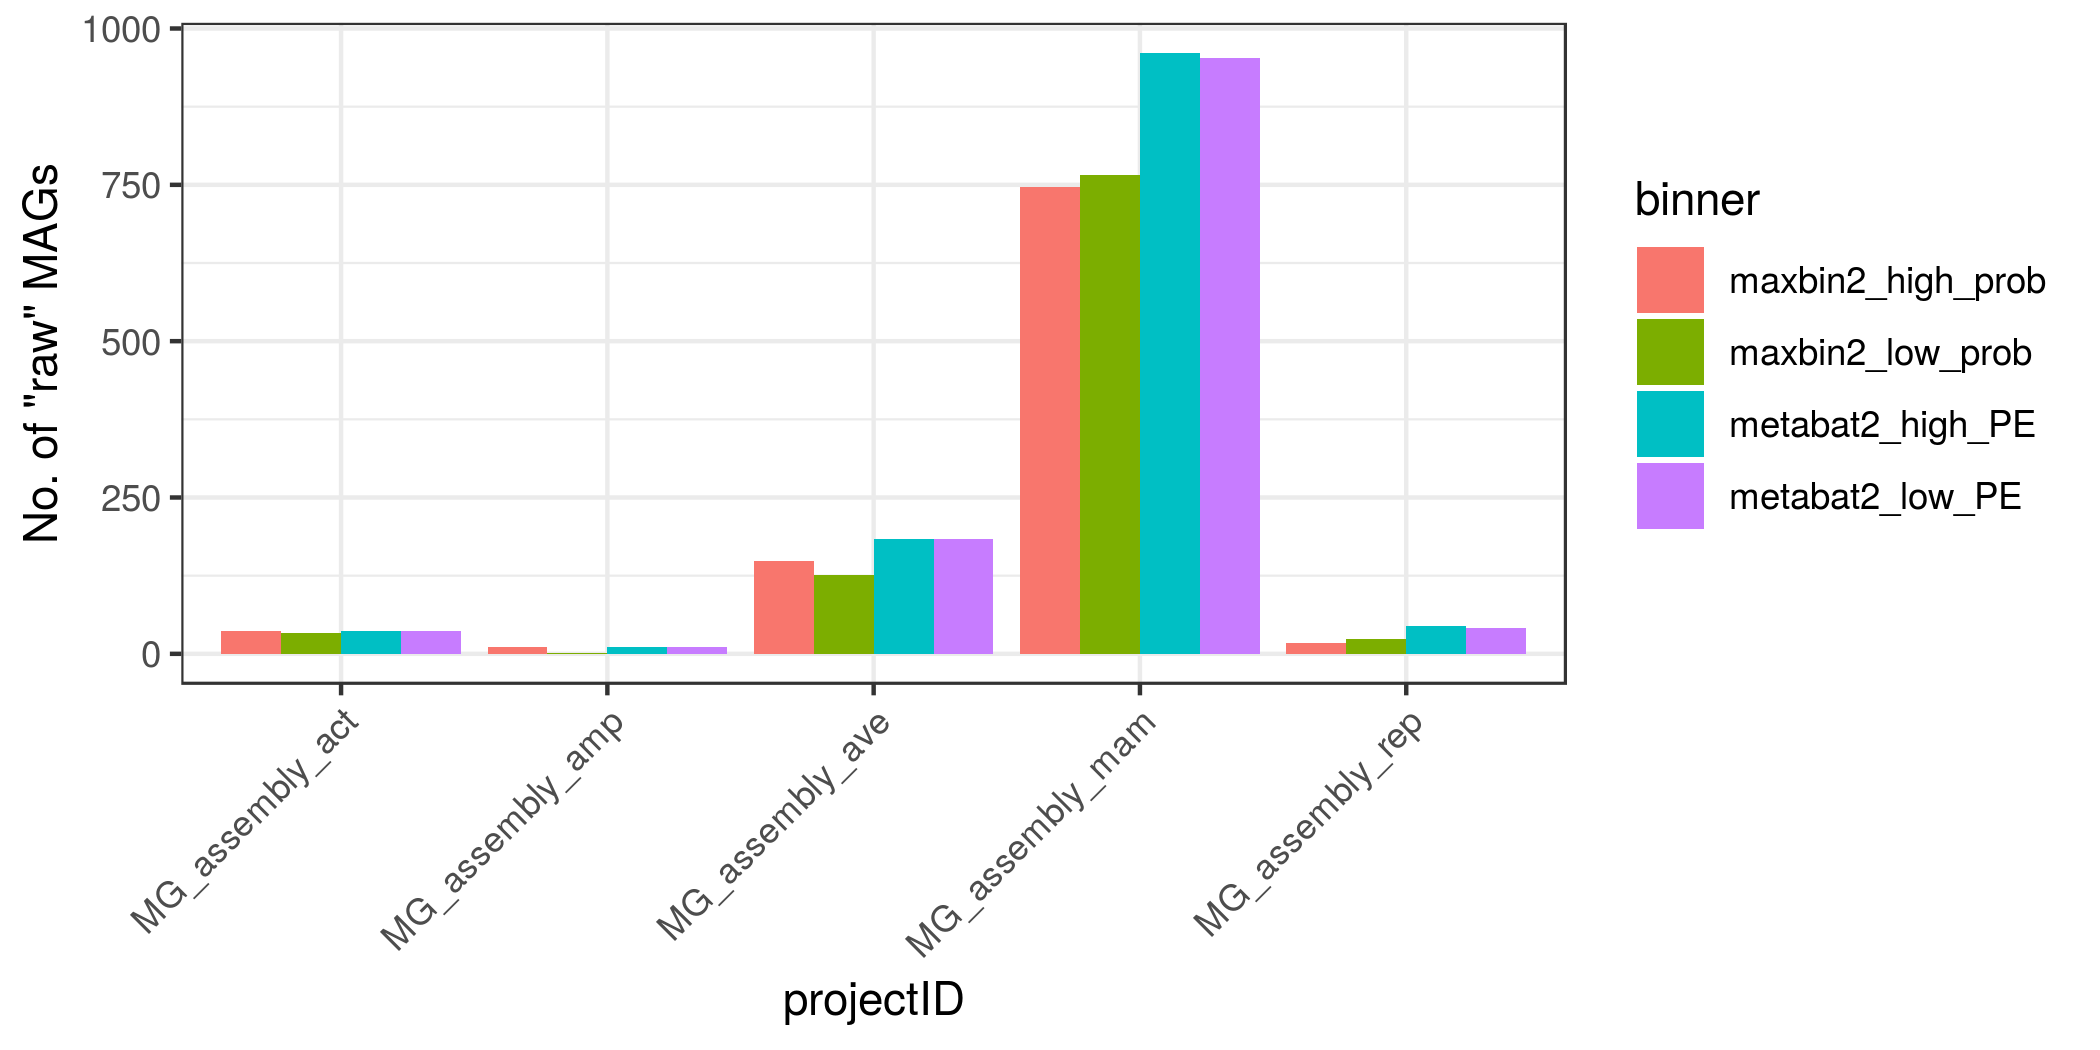

In [16]:
# number of 'raw' MAGs
bin_s = bin %>%
    group_by(projectID, binner) %>%
    summarize(n_bins = n()) %>%
    ungroup 

bin_s$n_bins %>% summary %>% print

p = bin_s %>%
    ggplot(aes(projectID, n_bins, fill=binner)) +
    geom_bar(stat='identity', position='dodge') +
    labs(y='No. of "raw" MAGs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(7,3.5)
plot(p)

## DAS-Tool

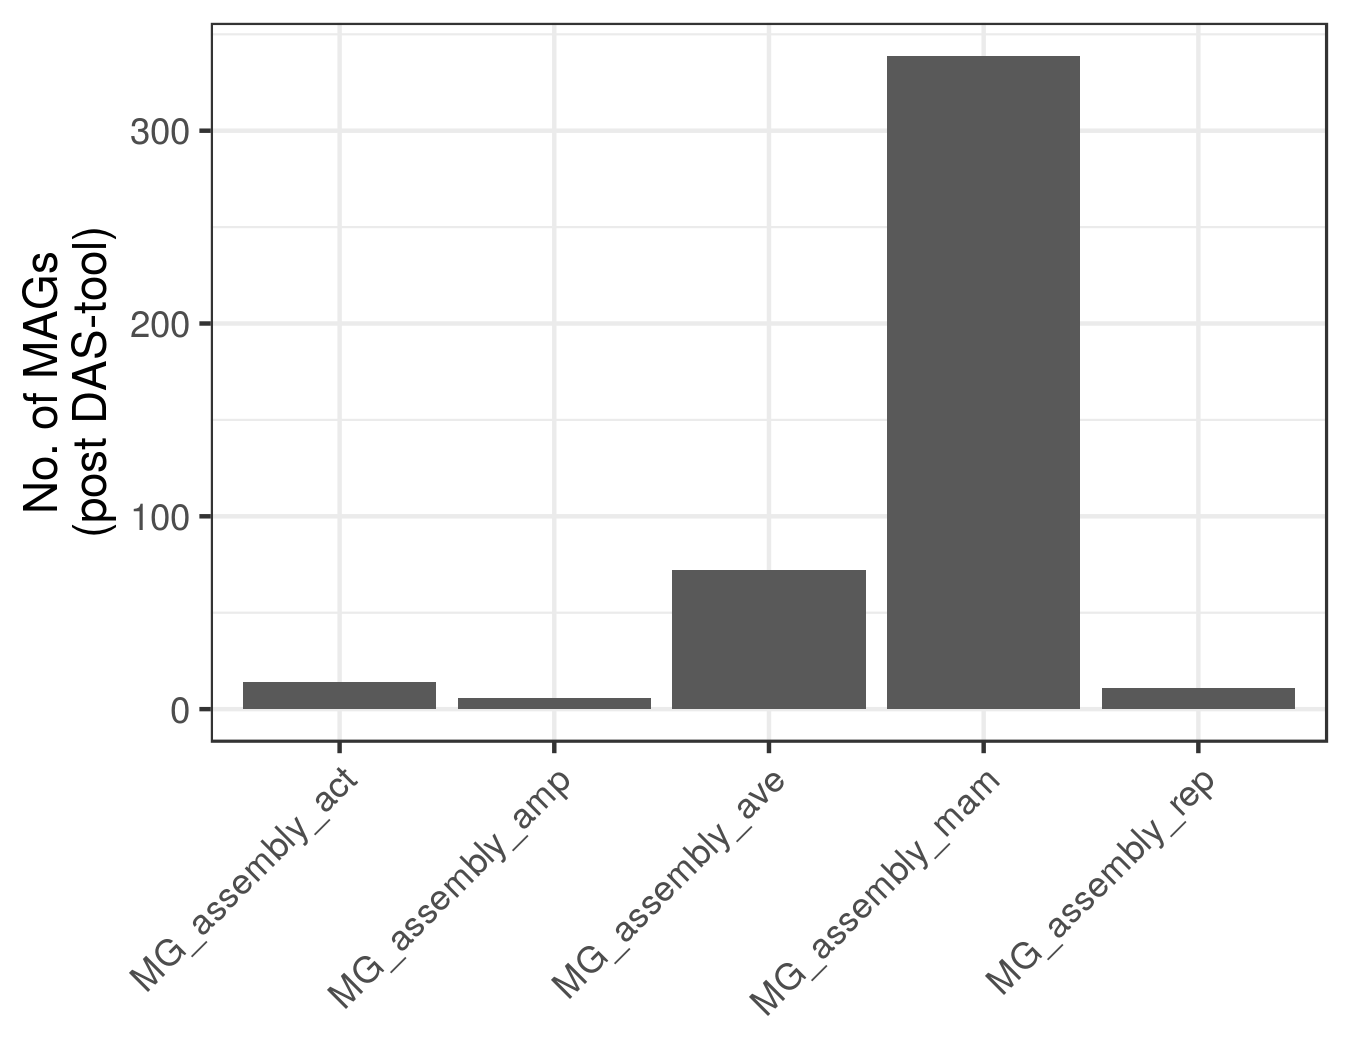

In [17]:
# number of genomes
p = dastool %>%
    ggplot(aes(projectID)) +
    geom_bar() +
    labs(y='No. of MAGs\n(post DAS-tool)') +
    theme_bw() +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(4.5,3.5)
plot(p)

.
maxbin2_high_prob  maxbin2_low_prob  metabat2_high_PE   metabat2_low_PE 
                4                 4                 5                 5 


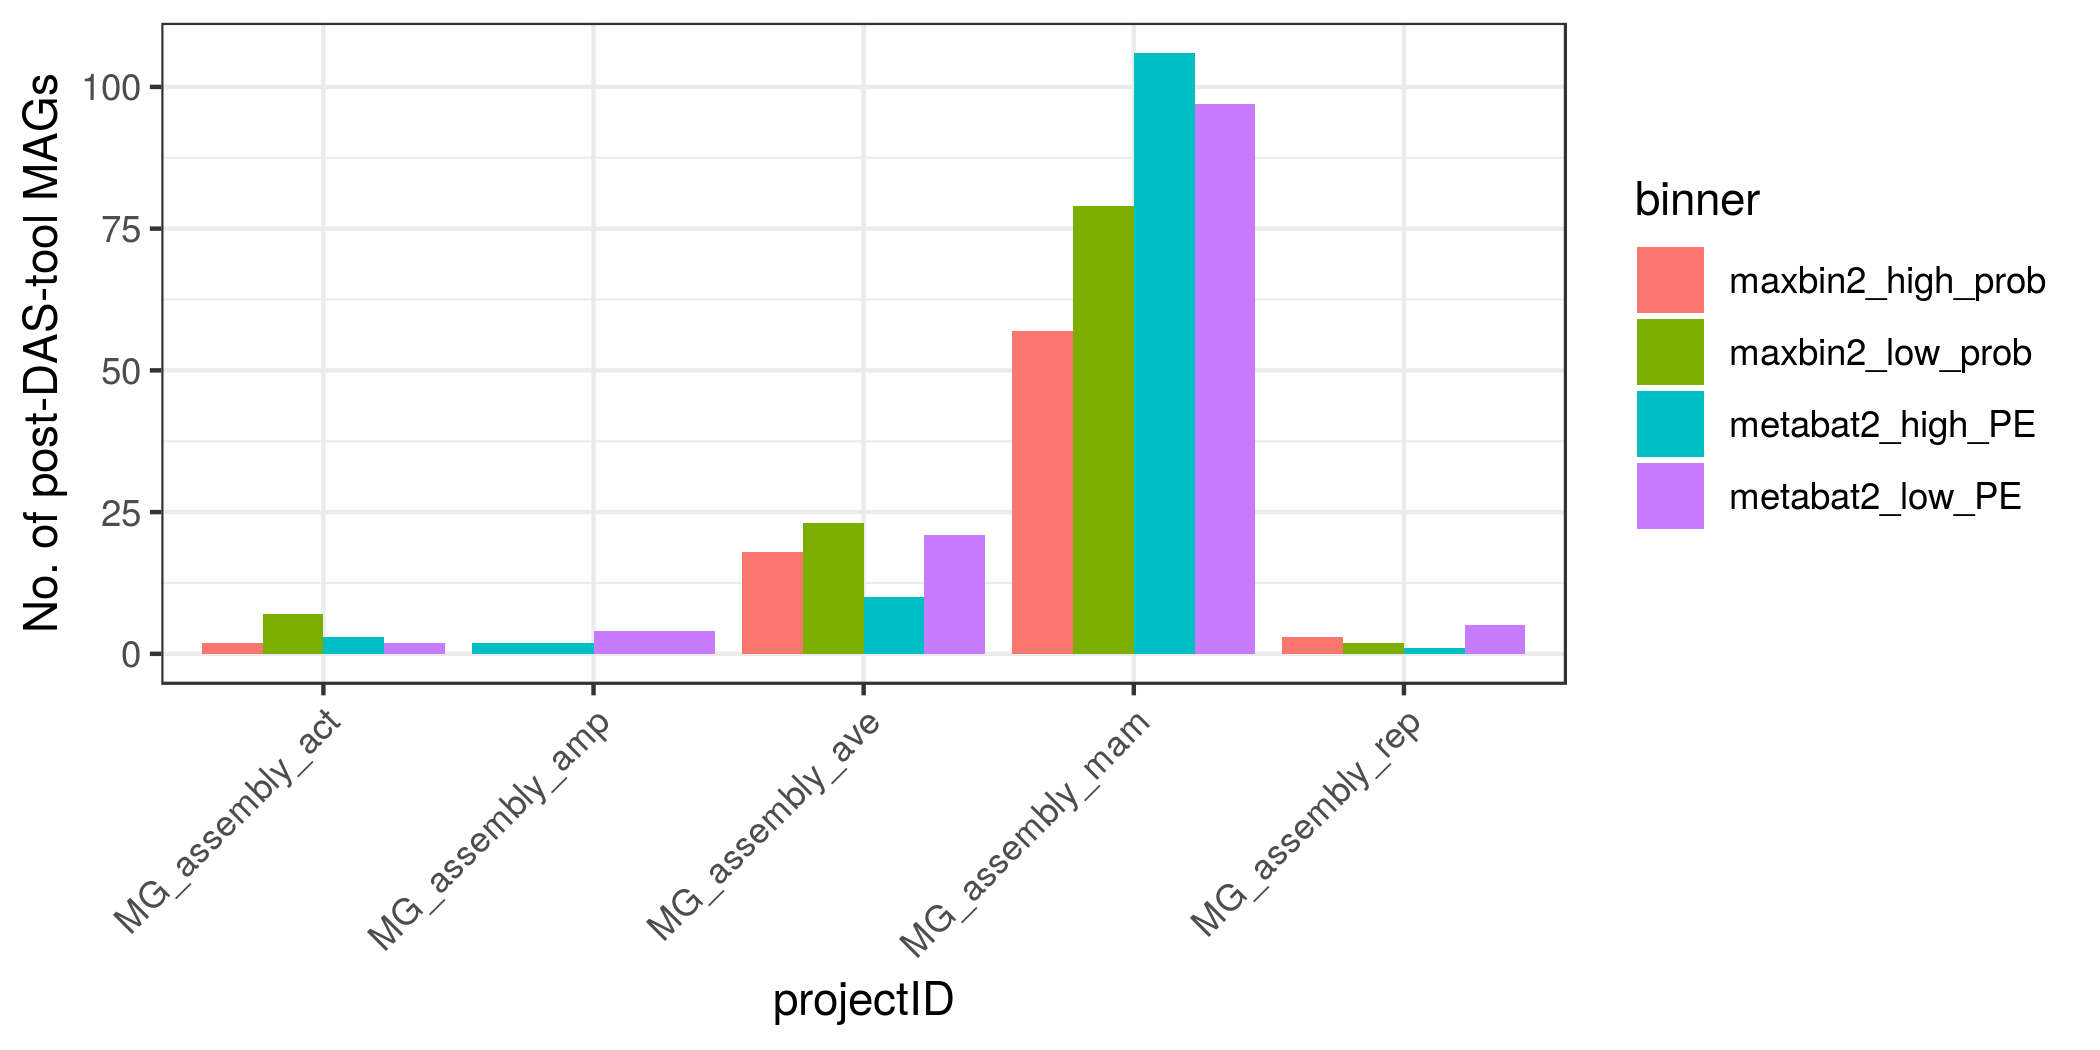

In [18]:
dastool_s = dastool %>%
    mutate(binner = gsub('.+__', '', binID),
           binner = gsub('\\.[0-9]+\\.contigs$', '', binner)) %>%
    group_by(projectID, binner) %>%
    summarize(n_bins = n()) %>%
    ungroup() 

dastool_s$binner %>% table %>% print

p = dastool_s %>%
    ggplot(aes(projectID, n_bins, fill=binner)) +
    geom_bar(stat='identity', position='dodge') +
    labs(y='No. of post-DAS-tool MAGs') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(7,3.5)
plot(p)

## dRep

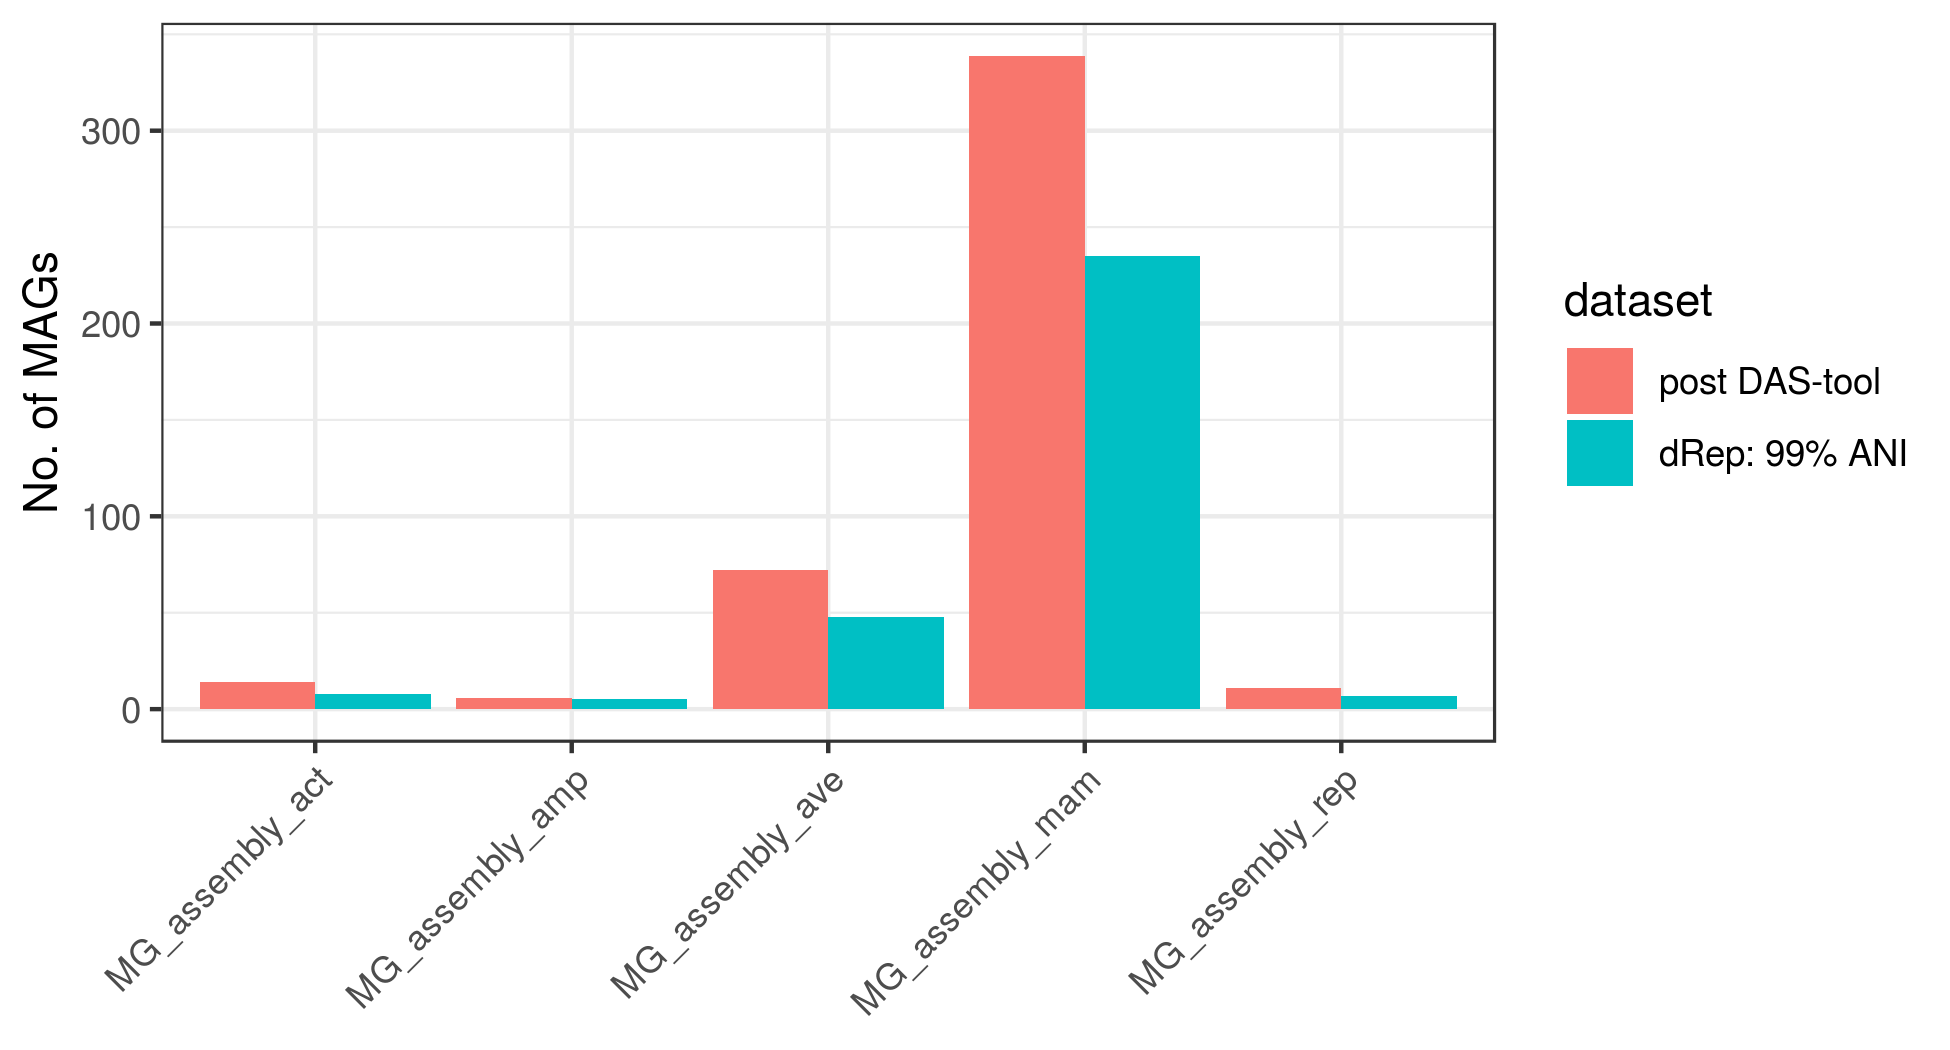

In [19]:
X = dastool %>% 
    group_by(projectID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    mutate(dataset = 'post DAS-tool')

Y = drep_j %>% 
    group_by(projectID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    mutate(dataset = 'dRep: 99% ANI')

p = rbind(X, Y) %>%
    mutate(dataset = dataset %>% factor(levels=c('post DAS-tool', 'dRep: 99% ANI'))) %>%
    ggplot(aes(projectID, n, fill=dataset)) +
    geom_bar(stat='identity', position='dodge') +
    labs(y='No. of MAGs') +
    theme_bw() +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(6.5,3.5)
plot(p)

# CheckM stats

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.39   75.89   91.09   84.94   95.58  100.00 
[1] 13.93139
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.540   1.130   1.464   2.180   5.000 
[1] 1.206455


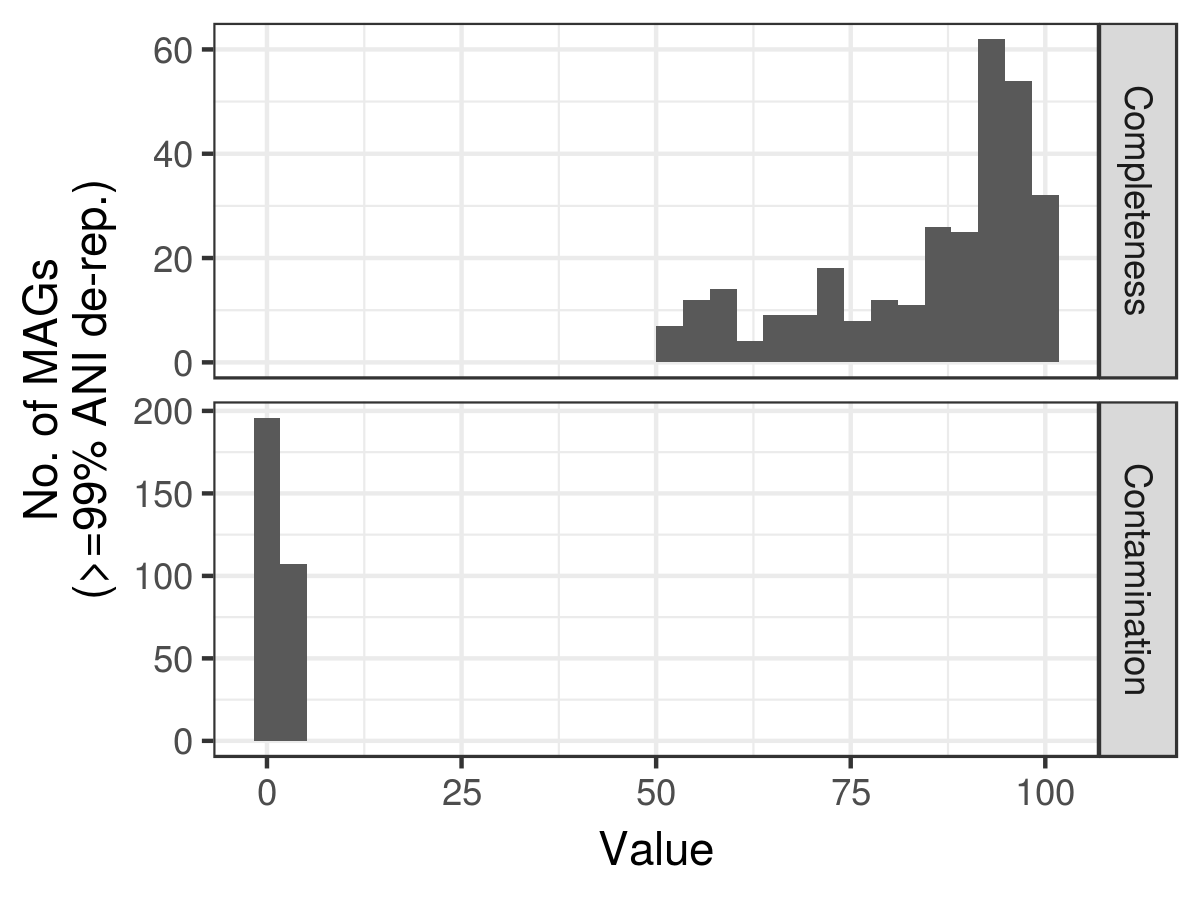

In [22]:
# checkm stats
drep_j$Completeness %>% summary %>% print
drep_j$Completeness %>% sd %>% print
drep_j$Contamination %>% summary %>% print
drep_j$Contamination %>% sd %>% print

p = drep_j %>%
    dplyr::select( binID, Completeness, Contamination) %>%
    gather(Metric, Value, -binID) %>%
    ggplot(aes(Value)) +
    geom_histogram(bins=30) +
    labs(y='No. of MAGs\n(>=99% ANI de-rep.)') +
    facet_grid(Metric ~ ., scales='free_y') +
    theme_bw() 

dims(4,3)
plot(p)

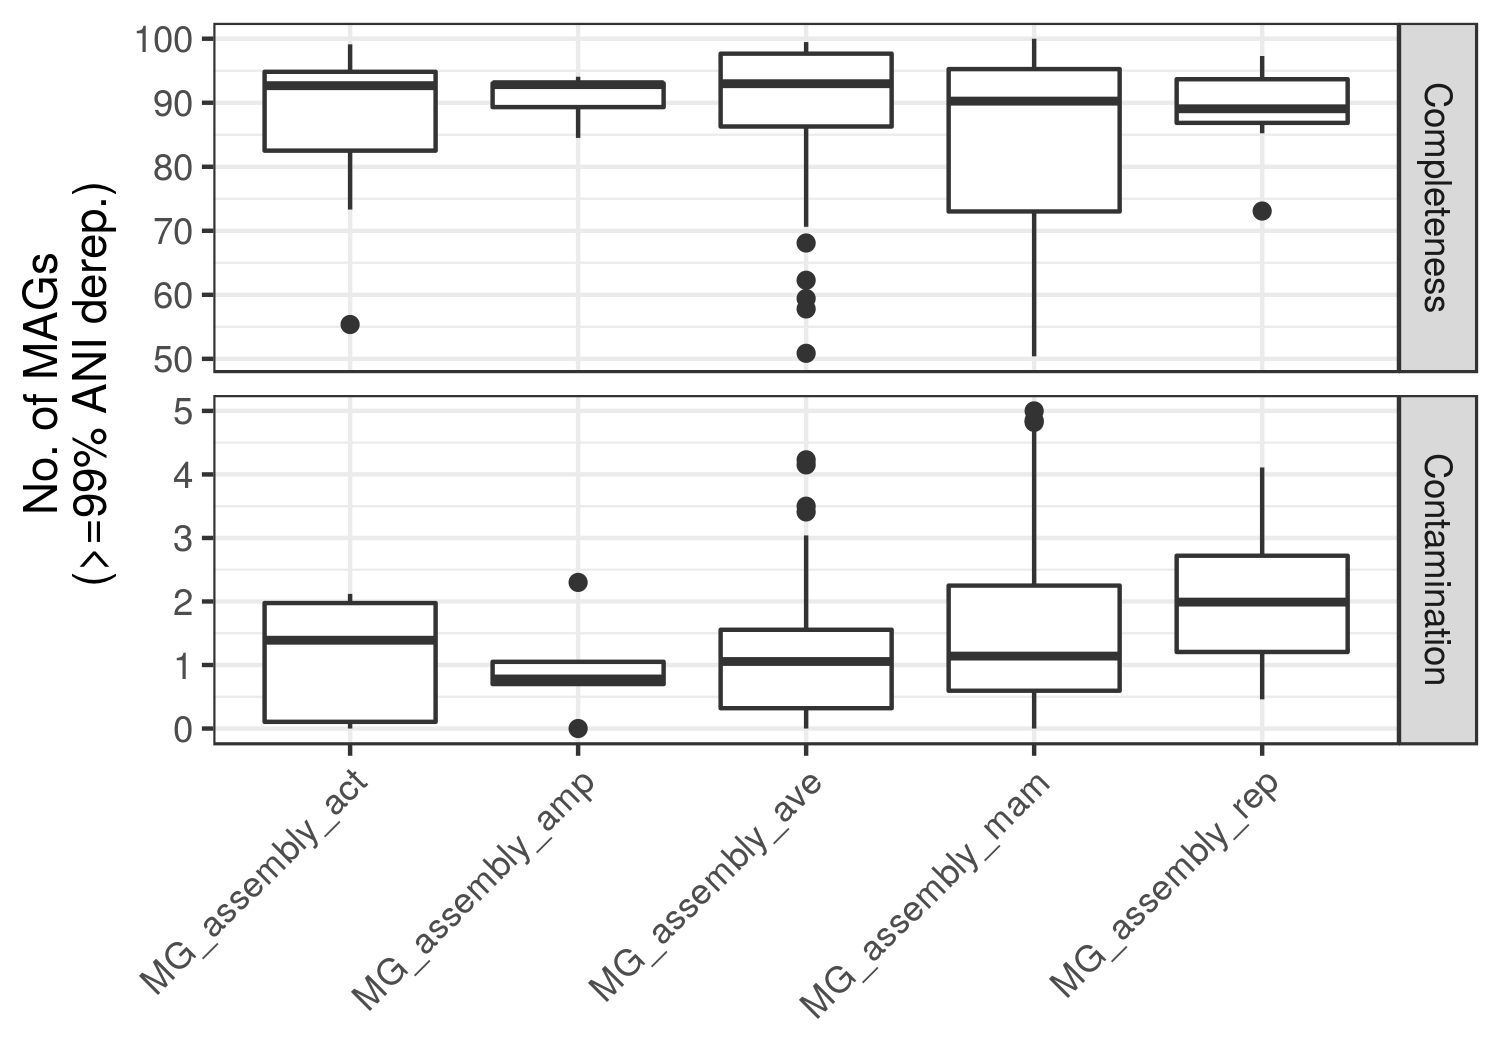

In [21]:
# checkm stats
p = drep_j %>%
    dplyr::select(projectID, binID, Completeness, Contamination) %>%
    gather(Metric, Value, -projectID, -binID) %>%
    ggplot(aes(projectID, Value)) +
    geom_boxplot() +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    facet_grid(Metric ~ ., scales='free_y') +
    theme_bw() +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(5,3.5)
plot(p)

# Taxonomy


## Total

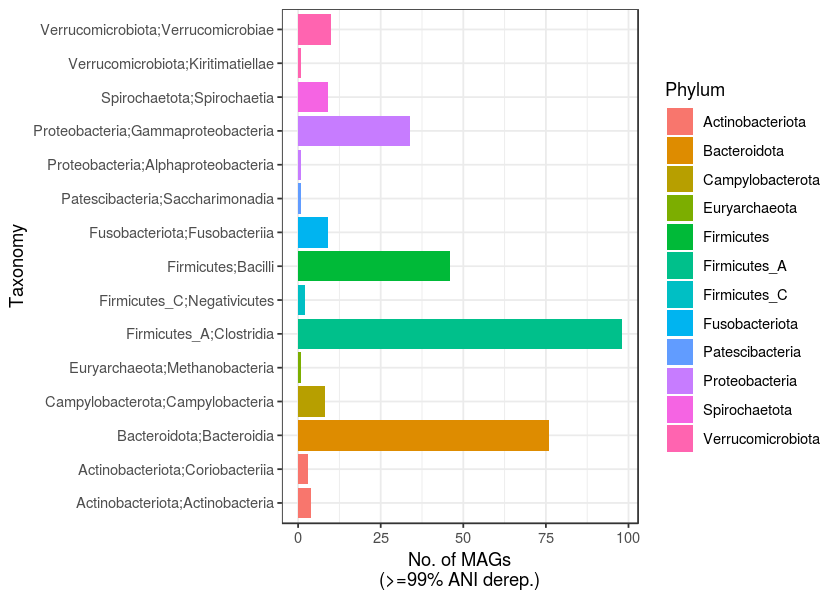

In [22]:
# Total by class
p = drep_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class)) %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    theme_bw() 

dims(7,5)
plot(p)

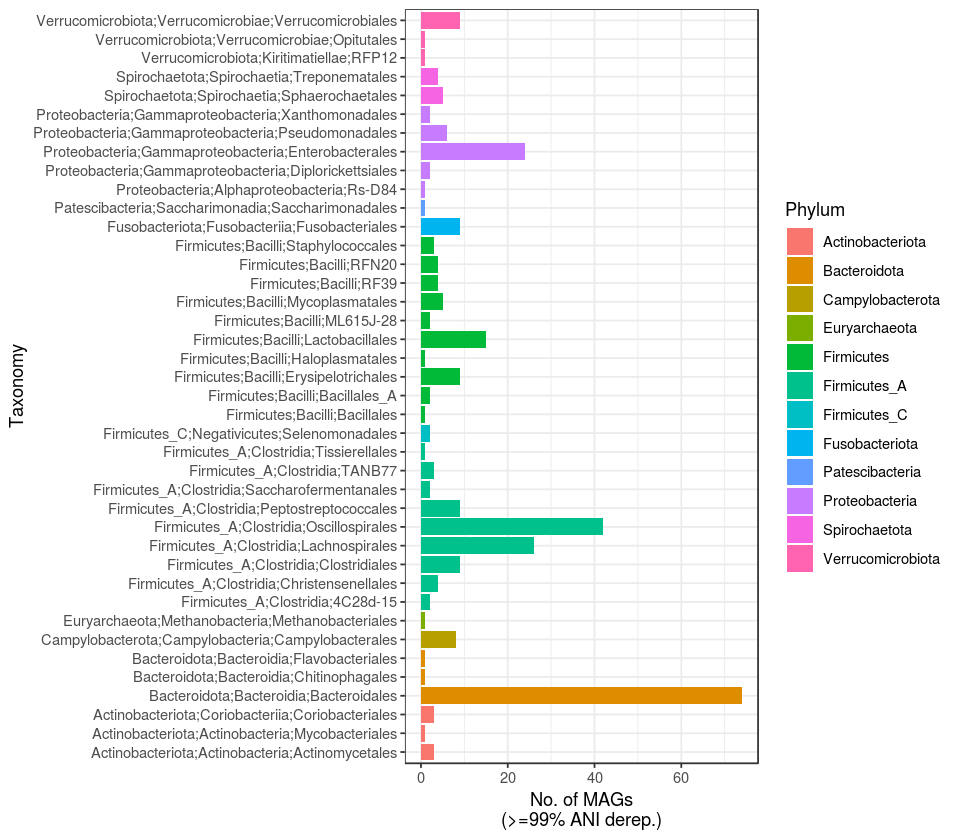

In [24]:
# Total by order
p = drep_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, Order, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    theme_bw() 

dims(8,7)
plot(p)

In [25]:
# Christ. genomes
drep_j %>%
    filter(Order == 'o__Christensenellales') %>%
    nrow %>% print
# Methanogen genomes
drep_j %>%
    filter(Domain == 'd__Archaea',
           grepl('^c__Methano', Class)) %>%
    nrow %>% print

[1] 4
[1] 1


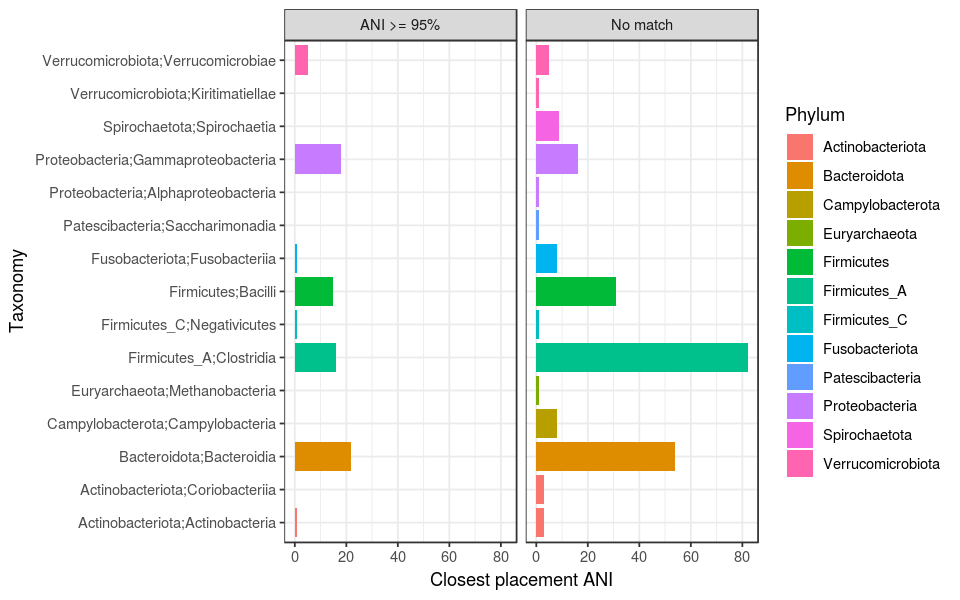

In [27]:
# no close ANI matches 
p = drep_j %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order)) %>%
    unite(Taxonomy, Phylum, Class, sep=';', remove=FALSE) %>%
    mutate(closest_placement_ani = closest_placement_ani %>% as.character,
           closest_placement_ani = ifelse(closest_placement_ani == 'N/A', 
                                          0, closest_placement_ani),
           closest_placement_ani = ifelse(is.na(closest_placement_ani), 
                                          0, closest_placement_ani),
           closest_placement_ani = closest_placement_ani %>% as.Num) %>%
    mutate(has_species_placement = ifelse(closest_placement_ani >= 95,
                                          'ANI >= 95%', 'No match')) %>%
    ggplot(aes(Taxonomy, fill=Phylum)) +
    geom_bar() +
    facet_grid(. ~ has_species_placement) +
    coord_flip() +
    labs(y='Closest placement ANI') +
    theme_bw() 

dims(8,5)
plot(p)

Number of genomes lacking a genus-level classification: 55 


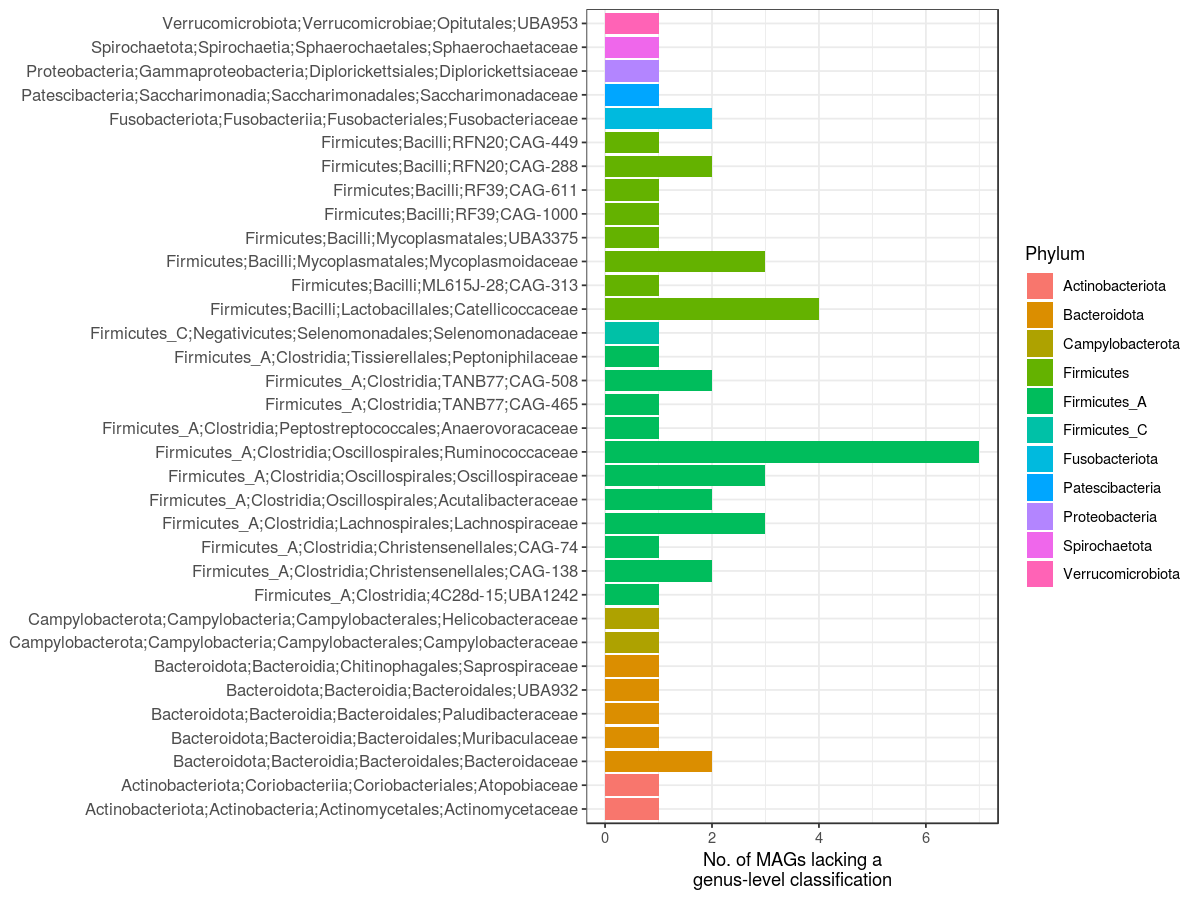

In [30]:
drep_j_s = drep_j %>%
    filter(Genus == 'g__') %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order),
           Family = gsub('^f__', '', Family)) %>%
    unite(Taxonomy, Phylum, Class, Order, Family, sep=';', remove=FALSE) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup()

cat('Number of genomes lacking a genus-level classification:',
    drep_j_s$n %>% sum, '\n')

p = drep_j_s %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs lacking a\ngenus-level classification') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=10),
        axis.title.y = element_blank()
    )

dims(10,7.5)
plot(p)

Number of genomes lacking a family-level classification: 0 


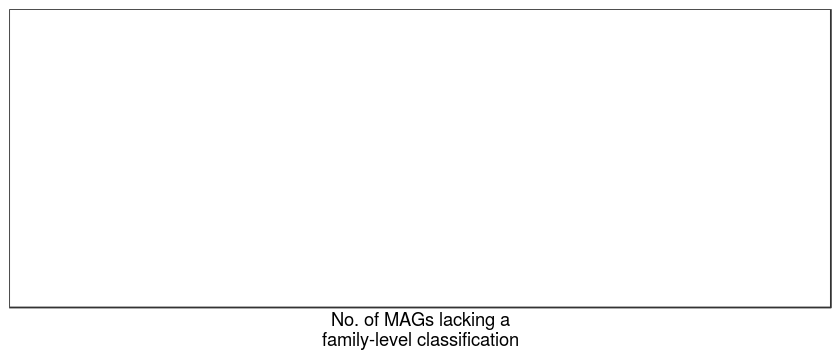

In [31]:
drep_j_s = drep_j %>%
    filter(Family == 'f__') %>%
    mutate(Phylum = gsub('^p__', '', Phylum),
           Class = gsub('^c__', '', Class),
           Order = gsub('^o__', '', Order),
           Family = gsub('^f__', '', Family)) %>%
    unite(Taxonomy, Phylum, Class, Order, Family, sep=';', remove=FALSE) %>%
    mutate(Taxonomy = gsub(';$', '', Taxonomy)) %>%
    group_by(Taxonomy, Phylum) %>%
    summarize(n = n()) %>%
    ungroup()

cat('Number of genomes lacking a family-level classification:',
    drep_j_s$n %>% sum, '\n')

p = drep_j_s %>%
    ggplot(aes(Taxonomy, n, fill=Phylum)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs lacking a\nfamily-level classification') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=9),
        axis.title.y = element_blank()
    )

dims(7,3)
plot(p)

## By host class

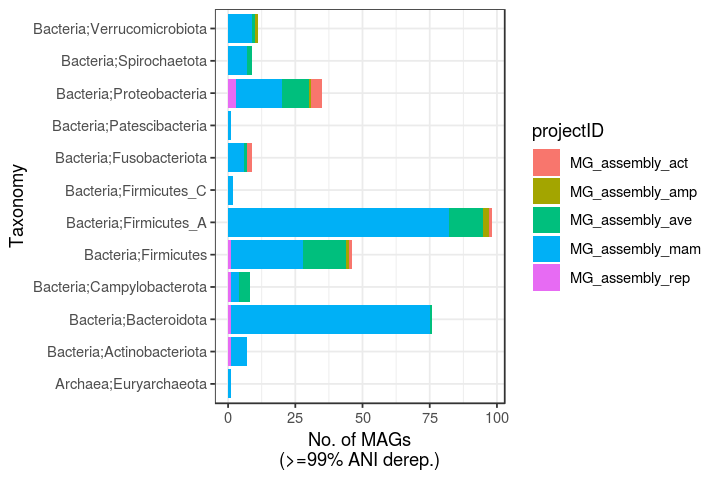

In [33]:
# Total by phylum
p = drep_j %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum)) %>%
    unite(Taxonomy, Domain, Phylum, sep=';', remove=FALSE) %>%
    group_by(projectID, Taxonomy, Domain) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=projectID)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    theme_bw() 

dims(6,4)
plot(p)

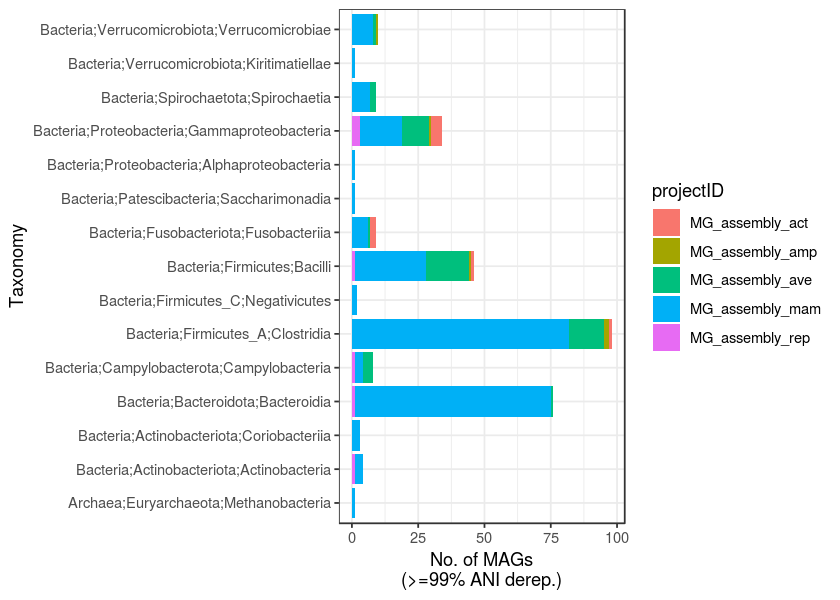

In [35]:
# Total by class
p = drep_j %>%
    mutate(Domain = gsub('^d__', '', Domain),
           Phylum = gsub('^p__', '', Phylum),
           Class =  gsub('^c__', '', Class)) %>%
    unite(Taxonomy, Domain, Phylum, Class, sep=';', remove=FALSE) %>%
    group_by(projectID, Taxonomy) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Taxonomy, n, fill=projectID)) +
    geom_bar(stat='identity') +
    coord_flip() +
    labs(y='No. of MAGs\n(>=99% ANI derep.)') +
    theme_bw() 

dims(7,5)
plot(p)

# sessionInfo

In [37]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2    data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselec